In [1]:
import sys
import nltk
import sklearn
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table('C:/Users/piyus/Downloads/smsspamcollection/SMSSpamCollection',header=None,names=['Labal','Body'])

In [3]:
df.head()

,Labal,Body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Labal.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Labal, dtype: float64

In [5]:
df.Body

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Body, Length: 5572, dtype: object

In [6]:
processed = df.Body.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','_EMAIL_')
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','_URL_')
processed = processed.str.replace(r'£|\$','_MONEY_')
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','_PHONENUMBER_')
processed = processed.str.replace(r'\d+(\.\d+)?','_NUMBER_')
processed = processed.str.replace(r'[^\w\d\s]',' ')
processed = processed.str.replace(r'\s+',' ')
processed = processed.str.replace(r'^\s+|\s+?$',' ')
processed = processed.str.lower()

In [7]:
processed

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in _number_ a wkly comp to win fa c...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the _number_nd time we have tried _num...
5568                 will ü b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Body, Length: 5572, dtype: object

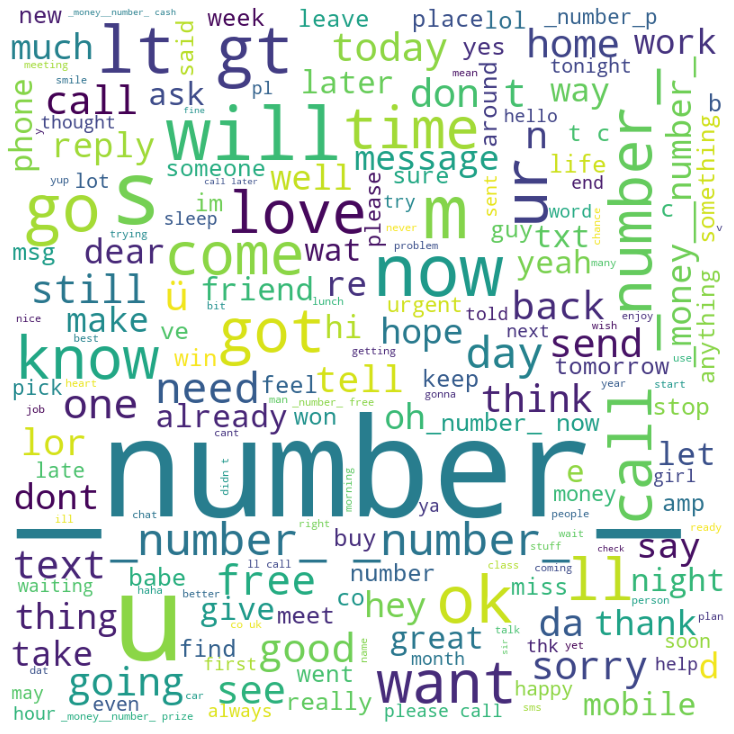

In [8]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(' '.join(processed)) 
import matplotlib.pyplot  as plt
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [9]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [10]:
nltk.sent_tokenize(' '.join(processed.to_list()))

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat  ok lar joking wif u oni  free entry in _number_ a wkly comp to win fa cup final tkts _number_st may _number_ text fa to _number_ to receive entry question std txt rate t c s apply _number_over_number_ s u dun say so early hor u c already then say  nah i don t think he goes to usf he lives around here though freemsg hey there darling it s been _number_ week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send _money__number_ to rcv even my brother is not like to speak with me they treat me like aids patent  as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press _number_ to copy your friends callertune winner as a valued network customer you have been selected to receivea _money__number_ prize reward to claim call _number_ claim code kl_number_ valid _number_ hours only  had your mobi

In [16]:
old_stop = stopwords.words('english')

new_stop=['a','b','c']
old_stop.extend(new_stop)

In [17]:
old_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
%time word_tok = list(filter(lambda x : x.lower() not in stopwords.words('english'),nltk.word_tokenize(' '.join(processed.to_list()))))

In [19]:
word_tok

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'free',
 'entry',
 '_number_',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '_number_st',
 'may',
 '_number_',
 'text',
 'fa',
 '_number_',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '_number_over_number_',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '_number_',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 '_money__number_',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '_number_',
 'cop

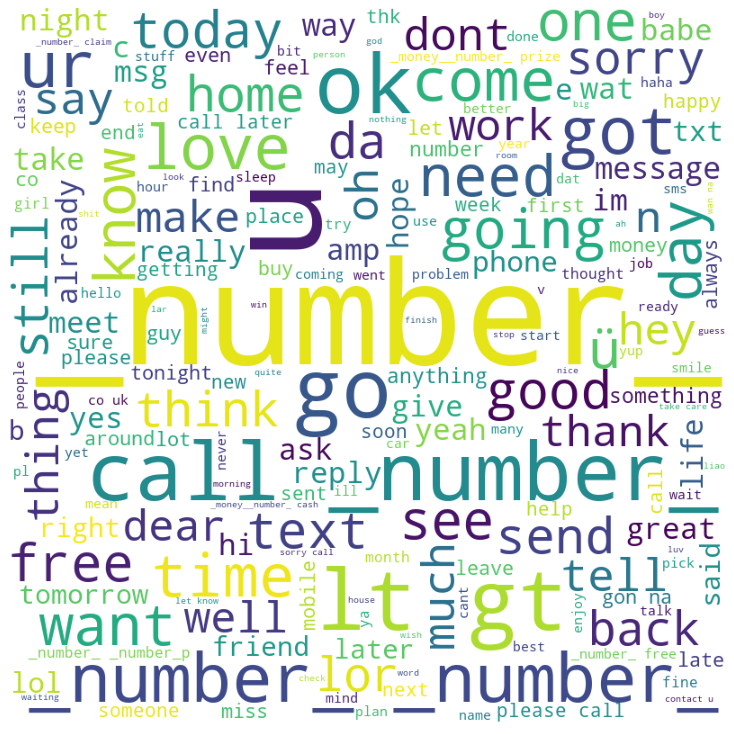

In [38]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(' '.join(word_tok)) 
import matplotlib.pyplot  as plt
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [20]:
all_words = nltk.FreqDist(word_tok)

In [22]:
all_words.most_common(100);

In [52]:
set(list(filter(lambda x:len(x)<2,word_tok)))

{'_',
 'b',
 'c',
 'e',
 'f',
 'g',
 'h',
 'j',
 'k',
 'l',
 'n',
 'p',
 'q',
 'r',
 'u',
 'v',
 'w',
 'x',
 'z',
 'é',
 'ü',
 '鈥'}

In [24]:
pstem=PorterStemmer()
word_tok=list(filter(lambda x:len(x)>2,word_tok))
word_tok=list(map(lambda x:pstem.stem(x),word_tok))

In [25]:
nltk.FreqDist(word_tok).most_common(100);

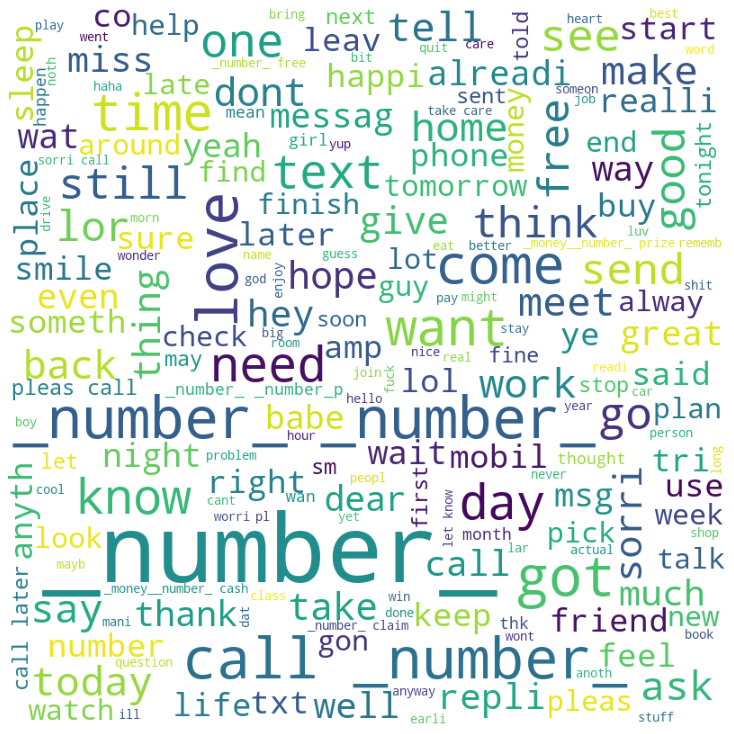

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(' '.join(word_tok)) 
import matplotlib.pyplot  as plt
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [27]:
len(set(word_tok))

6384

In [73]:
stopwords.words('english');

In [28]:
pstem = PorterStemmer()
def pre_processing(x):
    return ' '.join(list(filter(lambda x:len(x)>2,[pstem.stem(s) for s in nltk.word_tokenize(x) if s not in stopwords.words('english')])))
processed_=processed.apply(lambda x:pre_processing(x))

In [33]:
len(set(' '.join(processed_).split(' ')))

6331

In [34]:
sel_word_ = [i for i,j in nltk.FreqDist(nltk.word_tokenize(' '.join(processed_))).most_common(100)]

In [38]:
sel_word_

['_number_',
 'call',
 'get',
 'come',
 '_money__number_',
 'free',
 'day',
 'know',
 'love',
 'like',
 'got',
 'time',
 'good',
 'want',
 'text',
 'send',
 'txt',
 'need',
 'one',
 'today',
 'take',
 'see',
 'stop',
 'home',
 'think',
 'repli',
 'lor',
 'sorri',
 'still',
 'tell',
 '_number_p',
 'back',
 'mobil',
 'dont',
 'make',
 'week',
 'pleas',
 'phone',
 'say',
 'work',
 'new',
 'later',
 'hope',
 'miss',
 'ask',
 'meet',
 'msg',
 'messag',
 'night',
 'dear',
 'wait',
 'happi',
 'well',
 'tri',
 'give',
 'great',
 'much',
 'thing',
 'claim',
 'min',
 'wat',
 'hey',
 'number',
 'friend',
 'thank',
 'way',
 'www',
 'let',
 'prize',
 'feel',
 'even',
 'right',
 'tomorrow',
 'wan',
 'alreadi',
 'pick',
 'cash',
 'said',
 'care',
 'amp',
 'yeah',
 'leav',
 'realli',
 'tone',
 'babe',
 'win',
 'life',
 'morn',
 'find',
 'last',
 'sleep',
 'servic',
 'keep',
 'sure',
 'use',
 'anyth',
 'buy',
 'would',
 'year',
 'start']

In [35]:
def pre_process_feature(text_data):
    text_data=nltk.word_tokenize(text_data)
    curr={}
    for i in sel_word_:
        curr[i]=int(i in text_data)
    return curr

In [36]:
finl_processed_ = pd.concat([processed_,pd.DataFrame(processed_.apply(lambda x:pre_process_feature(x)).to_dict()).T,df.Labal],axis=1)

In [37]:
finl_processed_

,Body,_number_,call,get,come,_money__number_,free,day,know,love,...,servic,keep,sure,use,anyth,buy,would,year,start,Labal
0,jurong point crazi avail bugi great world buff...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,lar joke wif oni,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,free entri _number_ wkli comp win cup final tk...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,dun say earli hor alreadi say,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,nah think goe usf live around though,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,_number_nd time tri _number_ contact _money__n...,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
5568,esplanad home,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5569,piti mood suggest,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5570,guy bitch act like interest buy someth els nex...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,ham


In [132]:
X=finl_processed_.iloc[:,1:-1]

In [135]:
y=finl_processed_.iloc[:,-1].map({'ham':0,'spam':1})

In [250]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,stratify =y,test_size =0.25)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


In [251]:
train_tab=[]
test_tab=[]
for i in range(100,800,100):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(x_train,y_train)
    train_tab.append(rf.score(x_train,y_train))
    test_tab.append(rf.score(x_test,y_test))
    print(i)

100
200
300
400
500
600
700


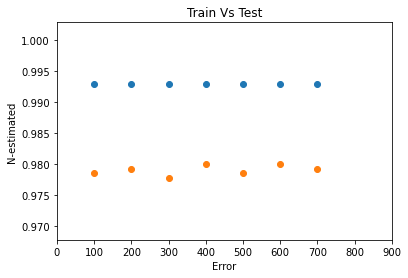

In [254]:
plt.scatter( range(100,800,100),train_tab)
plt.scatter( range(100,800,100),test_tab)
plt.title('Train Vs Test')
plt.ylabel('N-estimated')
plt.xlabel('Error')
plt.xlim(0,900)
plt.ylim(min(test_tab)-.01,max(train_tab)+.01)
plt.show()

In [261]:
max(test_tab),train_tab[test_tab.index(max(test_tab))] 

(0.9798994974874372, 0.9928212491026561)

# Clustring 

In [326]:
pd.DataFrame(processed_.apply(lambda x:pre_process_feature(x)).to_dict()).T

,_number_,call,get,come,_money__number_,free,day,know,love,like,...,sleep,servic,keep,sure,use,anyth,buy,would,year,start
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [327]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
%time km.fit(pd.DataFrame(processed_.apply(lambda x:pre_process_feature(x)).to_dict()).T)

clusters = km.labels_.tolist()

Wall time: 2.02 s


In [328]:
df['Cluster_count']=clusters

In [329]:
df[df['Cluster_count']==1]['Labal'].value_counts(normalize=True)

spam    0.539192
ham     0.460808
Name: Labal, dtype: float64

In [330]:
df[df['Cluster_count']==0]['Labal'].value_counts(normalize=True)

ham     0.984683
spam    0.015317
Name: Labal, dtype: float64

In [358]:
accuracy_score(df['Labal'].map({'ham':0,'spam':1}),df['Cluster_count'])

0.8837042354630295

In [359]:
confusion_matrix(df['Labal'].map({'ham':0,'spam':1}),df['Cluster_count'])

array([[4243,  582],
       [  66,  681]], dtype=int64)

# tf-idf
*tdidf*

In [48]:
len(set(nltk.word_tokenize(' '.join(processed_))))

6330

In [49]:
nltk.FreqDist(nltk.word_tokenize(' '.join(processed_)))

FreqDist({'_number_': 2649, 'call': 674, 'get': 451, 'come': 304, '_money__number_': 303, 'free': 284, 'day': 276, 'know': 275, 'love': 266, 'like': 261, ...})

In [55]:
Tfidf=TfidfVectorizer(ngram_range=(1,2))

In [56]:
processed_

0       jurong point crazi avail bugi great world buff...
1                                        lar joke wif oni
2       free entri _number_ wkli comp win cup final tk...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    _number_nd time tri _number_ contact _money__n...
5568                                        esplanad home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Body, Length: 5572, dtype: object

In [57]:
tfidf = Tfidf.fit(nltk.word_tokenize(' '.join(processed_)))

In [58]:
tfidf_processed_ = tfidf.transform(processed_).toarray()

In [59]:
tfidf_processed_ = pd.DataFrame(tfidf_processed_,columns=tfidf.get_feature_names())

In [61]:
finl_processed_tf = pd.concat([tfidf_processed_,df.Labal],axis=1)

In [284]:
Xtf=finl_processed_tf.iloc[:,:-1]

In [285]:
ytf=finl_processed_tf.iloc[:,-1].map({'ham':0,'spam':1})

In [286]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Xtf,ytf,stratify =ytf,test_size =0.25)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


In [288]:
train_tab=[]
test_tab=[]
for i in range(100,800,100):
    rf=RandomForestClassifier(n_estimators=i,max_samples=np.random.randint(6,10)/10,min_samples_split=np.random.randint(2,5)/10)
    rf.fit(x_train,y_train)
    train_tab.append(rf.score(x_train,y_train))
    test_tab.append(rf.score(x_test,y_test))
    print(train_tab)
    print(test_tab)

[0.981574539363484]
[0.9755922469490309]
[0.981574539363484, 0.9818138310600623]
[0.9755922469490309, 0.9806173725771715]
[0.981574539363484, 0.9818138310600623, 0.9810959559703278]
[0.9755922469490309, 0.9806173725771715, 0.9798994974874372]
[0.981574539363484, 0.9818138310600623, 0.9810959559703278, 0.9763101220387652]
[0.9755922469490309, 0.9806173725771715, 0.9798994974874372, 0.9770279971284996]
[0.981574539363484, 0.9818138310600623, 0.9810959559703278, 0.9763101220387652, 0.9806173725771715]
[0.9755922469490309, 0.9806173725771715, 0.9798994974874372, 0.9770279971284996, 0.9798994974874372]
[0.981574539363484, 0.9818138310600623, 0.9810959559703278, 0.9763101220387652, 0.9806173725771715, 0.9798994974874372]
[0.9755922469490309, 0.9806173725771715, 0.9798994974874372, 0.9770279971284996, 0.9798994974874372, 0.9806173725771715]
[0.981574539363484, 0.9818138310600623, 0.9810959559703278, 0.9763101220387652, 0.9806173725771715, 0.9798994974874372, 0.9801387891840153]
[0.97559224694

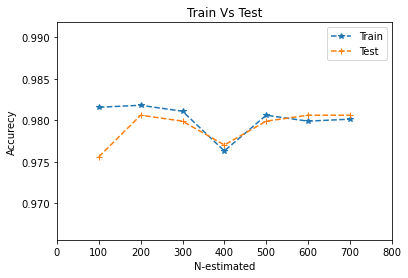

In [302]:
plt.plot( range(100,800,100),train_tab,'--*')
plt.plot( range(100,800,100),test_tab,'--+')
plt.title('Train Vs Test')
plt.ylabel('Accurecy')
plt.xlabel('N-estimated')
plt.xlim(0,800)
plt.ylim(min(test_tab)-.01,max(train_tab)+.01)
plt.legend(['Train','Test'])
plt.show()

In [290]:
max(test_tab),train_tab[test_tab.index(max(test_tab))] 

(0.9806173725771715, 0.9818138310600623)

# Clusting on tf idf 

In [62]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
%time km.fit(tfidf_processed_)

clusters = km.labels_.tolist()

Wall time: 31.1 s


In [63]:
df['Cluster']=clusters

In [64]:
df[df['Cluster']==1]['Labal'].value_counts(normalize=True)

spam    0.668161
ham     0.331839
Name: Labal, dtype: float64

In [357]:
df[df['Cluster']==0]['Labal'].value_counts(normalize=True)

ham     0.976562
spam    0.023438
Name: Labal, dtype: float64

In [348]:
df[df['Cluster']==1]['Labal'].value_counts(normalize=True).values+df[df['Cluster']==0]['Labal'].value_counts(normalize=True).values

array([1.63942557, 0.36057443])

In [354]:
accuracy_score(df['Labal'].map({'ham':0,'spam':1}),df['Cluster'])

0.9222900215362527

In [355]:
confusion_matrix(df['Labal'].map({'ham':0,'spam':1}),df['Cluster'])

array([[4500,  325],
       [ 108,  639]], dtype=int64)

In [378]:
df[df['Cluster_count']!=df['Target']].groupby(['Target','Cluster']).size()

Target  Cluster
0       0          257
        1          325
1       0           66
dtype: int64

In [379]:
df[df['Cluster']!=df['Target']].groupby(['Target','Cluster_count']).size()

Target  Cluster_count
0       1                325
1       0                 66
        1                 42
dtype: int64

In [381]:
df[(df['Cluster']!=df['Target'])&(df['Cluster_count']!=df['Target'])].shape

(391, 5)

In [65]:
df

,Labal,Body,Cluster
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [654]:
[i for i in nltk.FreqDist(nltk.word_tokenize(' '.join(custer_ana[custer_ana['cluster']==3]['Body'])))]

In [655]:
comm_word=[]
for ix in range(K):
    temp = [i for i in nltk.FreqDist(nltk.word_tokenize(' '.join(custer_ana[custer_ana['cluster']==ix]['Body'])))]
    if ix==1:
        comm_word=temp.copy()
    else:
        comm_word = set(comm_word).intersection(temp)

In [66]:
comm_word=[]

In [67]:
dic={}
for i in df.Cluster.unique():
    dic[i]=' '.join([se for sent in nltk.sent_tokenize(' '.join(df[df['Cluster']==i]['Body'])) for se in nltk.word_tokenize(sent) if se not in comm_word])

"Go until jurong point , crazy .. Available only in bugis n great world la e buffet ... Cine there got amore wat ... Ok lar ... Joking wif u oni ... U dun say so early hor ... U c already then say ... Nah I do n't think he goes to usf , he lives around here though FreeMsg Hey there darling it 's been 3 week 's now and no word back ! I 'd like some fun you up for it still ? Tb ok ! XxX std chgs to send , £1.50 to rcv Even my brother is not like to speak with me . They treat me like aids patent . As per your request 'Melle Melle ( Oru Minnaminunginte Nurungu Vettam ) ' has been set as your callertune for all Callers . Press * 9 to copy your friends Callertune I 'm gon na be home soon and i do n't want to talk about this stuff anymore tonight , k ? I 've cried enough today . I 've been searching for the right words to thank you for this breather . I promise i wont take your help for granted and will fulfil my promise . You have been wonderful and a blessing at all times . I HAVE A DATE ON

In [68]:
for i in df.Cluster.unique():
   
    print(' ')
    print('Cluster',i)
    print('    ',end='')
    print(', '.join([i[0] for i in nltk.FreqDist(dic[i].split(' ')).most_common()[:10]]))

 
Cluster 0
    ., I, you, to, ,, ?, the, ..., a, i
 
Cluster 1
    ., to, !, ,, 2, a, &, 4, ?, call


In [659]:
len(set(' '.join(custer_ana[custer_ana['cluster']==1]['Body'].to_list()).split(' ')))

236

In [660]:
len(comm_word)

17

# ------------- End -------------------

In [396]:
from textblob import TextBlob
df['Polarity']=processed_.apply(lambda x:TextBlob(x).sentiment.polarity)
df['Subjectivity']=processed_.apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [397]:
df

,Labal,Body,Cluster,Cluster_count,Target,Polarity,Subjectivity
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0.800000,0.750000
1,ham,Ok lar... Joking wif u oni...,0,0,0,0.000000,0.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1,1,0.400000,0.733333
3,ham,U dun say so early hor... U c already then say...,0,0,0,0.000000,0.000000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0.136364,0.500000
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,1,1,0.000000,0.000000
5568,ham,Will ü b going to esplanade fr home?,0,0,0,0.000000,0.000000
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0,0.000000,0.000000
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0,0.200000,0.400000


In [403]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [406]:
x_train,x_test,y_train,y_test = train_test_split(df[(df['Cluster']!=df['Target'])&(df['Cluster_count']!=df['Target'])][['Cluster_count','Cluster','Polarity','Subjectivity']],df[(df['Cluster']!=df['Target'])&(df['Cluster_count']!=df['Target'])]['Target'],test_size =0.25)

In [407]:
lg.fit(x_train,y_train)

LogisticRegression()

In [408]:
confusion_matrix(y_test,lg.predict(x_test))

array([[82,  0],
       [ 0, 16]], dtype=int64)

In [409]:
accuracy_score(y_test,lg.predict(x_test))

1.0

In [417]:
y_test.value_counts()

0    82
1    16
Name: Target, dtype: int64

In [418]:
from gensim.models import Word2Vec

# Clustring Analysis

In [39]:
count_processed_=pd.DataFrame(processed_.apply(lambda x:pre_process_feature(x)).to_dict()).T

In [40]:
count_processed_

,_number_,call,get,come,_money__number_,free,day,know,love,like,...,sleep,servic,keep,sure,use,anyth,buy,would,year,start
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [435]:
from sklearn.cluster import KMeans
k_means_result=[]

for k in range(1,100,2):
    km = KMeans(n_clusters=k, random_state=0)
    %time km.fit(count_processed_)
    k_means_result.append(km.inertia_)
    clusters = km.labels_.tolist()



Wall time: 712 ms
Wall time: 283 ms
Wall time: 420 ms
Wall time: 586 ms
Wall time: 704 ms
Wall time: 821 ms
Wall time: 1.02 s
Wall time: 1.14 s
Wall time: 1.19 s
Wall time: 1.32 s
Wall time: 1.38 s
Wall time: 1.51 s
Wall time: 1.6 s
Wall time: 1.64 s
Wall time: 1.73 s
Wall time: 1.79 s
Wall time: 1.85 s
Wall time: 1.94 s
Wall time: 1.89 s
Wall time: 2.03 s
Wall time: 2.11 s
Wall time: 2.28 s
Wall time: 2.36 s
Wall time: 2.49 s
Wall time: 2.57 s
Wall time: 2.7 s
Wall time: 2.55 s
Wall time: 2.6 s
Wall time: 2.7 s
Wall time: 2.76 s
Wall time: 2.91 s
Wall time: 2.86 s
Wall time: 3.07 s
Wall time: 3.01 s
Wall time: 2.98 s
Wall time: 3.13 s
Wall time: 3.3 s
Wall time: 3.37 s
Wall time: 3.35 s
Wall time: 3.39 s
Wall time: 3.41 s
Wall time: 3.85 s
Wall time: 3.5 s
Wall time: 3.58 s
Wall time: 3.68 s
Wall time: 3.9 s
Wall time: 3.86 s
Wall time: 4.08 s
Wall time: 3.96 s
Wall time: 4.06 s


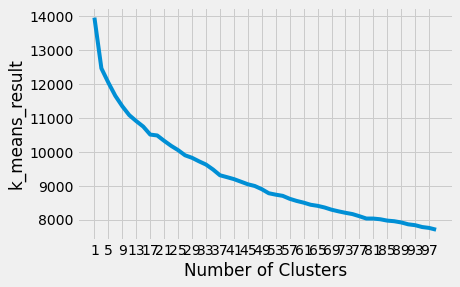

In [436]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,100,2), k_means_result)
plt.xticks(range(1,100,4))
plt.xlabel("Number of Clusters")
plt.ylabel("k_means_result")
plt.show()

In [41]:
from sklearn.cluster import KMeans
k_means_result=[]
K=10
km = KMeans(n_clusters=K, random_state=0)
%time km.fit(count_processed_)
clusters = km.labels_.tolist()



Wall time: 4.36 s


In [42]:
custer_ana=processed_.copy()

In [44]:
custer_ana=pd.DataFrame(custer_ana)
custer_ana['cluster']=clusters

In [45]:
custer_ana['cluster'].value_counts(normalize=True)

0    0.588478
7    0.102297
2    0.078428
3    0.048277
5    0.038227
8    0.037688
6    0.036073
9    0.032484
4    0.025305
1    0.012742
Name: cluster, dtype: float64

In [47]:
custer_ana

,Body,cluster
0,jurong point crazi avail bugi great world buff...,0
1,lar joke wif oni,0
2,free entri _number_ wkli comp win cup final tk...,6
3,dun say earli hor alreadi say,0
4,nah think goe usf live around though,0
...,...,...
5567,_number_nd time tri _number_ contact _money__n...,4
5568,esplanad home,0
5569,piti mood suggest,0
5570,guy bitch act like interest buy someth els nex...,5


In [654]:
[i for i in nltk.FreqDist(nltk.word_tokenize(' '.join(custer_ana[custer_ana['cluster']==3]['Body'])))];

In [655]:
comm_word=[]
for ix in range(K):
    temp = [i for i in nltk.FreqDist(nltk.word_tokenize(' '.join(custer_ana[custer_ana['cluster']==ix]['Body'])))]
    if ix==1:
        comm_word=temp.copy()
    else:
        comm_word = set(comm_word).intersection(temp)

In [656]:
comm_word

{'_number_',
 'back',
 'dear',
 'even',
 'get',
 'great',
 'help',
 'mobil',
 'night',
 'number',
 'pleas',
 'repli',
 'shop',
 'tell',
 'thank',
 'think',
 'today'}

In [657]:
dic={}
for i in custer_ana.cluster.unique():
    dic[i]=' '.join([se for sent in nltk.sent_tokenize(' '.join(custer_ana[custer_ana['cluster']==i]['Body'])) for se in nltk.word_tokenize(sent) if se not in comm_word])

In [664]:
for i in custer_ana.cluster.unique():
   
    print(' ')
    print('Cluster',i)
    print('    ',end='')
    print(', '.join([i[0] for i in nltk.FreqDist(dic[i].split(' ')).most_common()[:10]]))

 
Cluster 0
    know, got, time, want, love, need, see, still, one, say
 
Cluster 6
    txt, free, _money__number_, tone, _number_p, stop, text, www, nokia, win
 
Cluster 5
    like, know, dont, time, would, love, look, feel, smile, send
 
Cluster 7
    lor, got, stop, text, send, wan, want, _number_p, meet, msg
 
Cluster 4
    _money__number_, call, prize, claim, urgent, award, guarante, cash, contact, _number_ppm
 
Cluster 2
    call, free, min, later, sorri, phone, text, _number_p, camera, servic
 
Cluster 1
    messag, send, phone, miss, right, cant, pick, sent, smile, see
 
Cluster 8
    good, day, morn, love, happi, hope, time, _number_th, afternoon, smile
 
Cluster 3
    come, home, want, time, tomorrow, got, like, see, one, need
 
Cluster 9
    day, love, happi, wish, one, know, hope, send, miss, nice


In [ ]:
'Piyush is going not goi he mustg be rty' 3 4

In [659]:
len(set(' '.join(custer_ana[custer_ana['cluster']==1]['Body'].to_list()).split(' ')))

236

In [660]:
len(comm_word)

17

In [ ]:
TfidfVectorizer(min_df=)